# Delivery_time -> Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python. --y = Delivery_time & x= sorting time

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset

In [3]:
df = pd.read_csv(r'D:\Data science\Assignments\uploaded on github\Simple Linear Regression\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Visualization

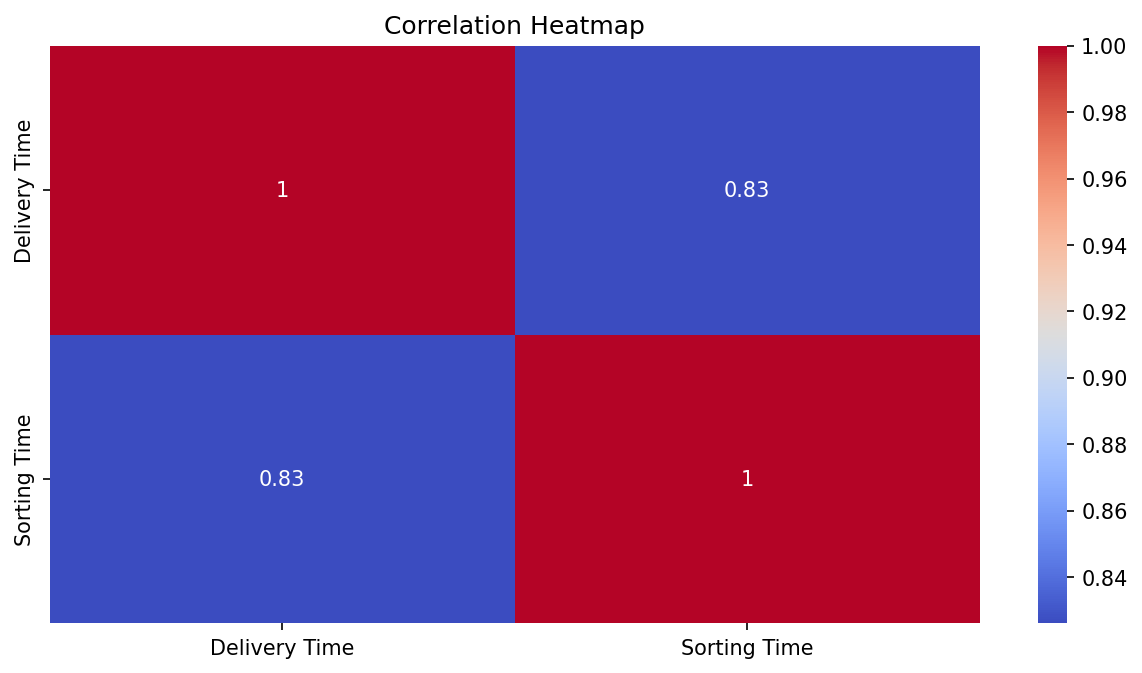

In [7]:
# Correlation heatmap

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

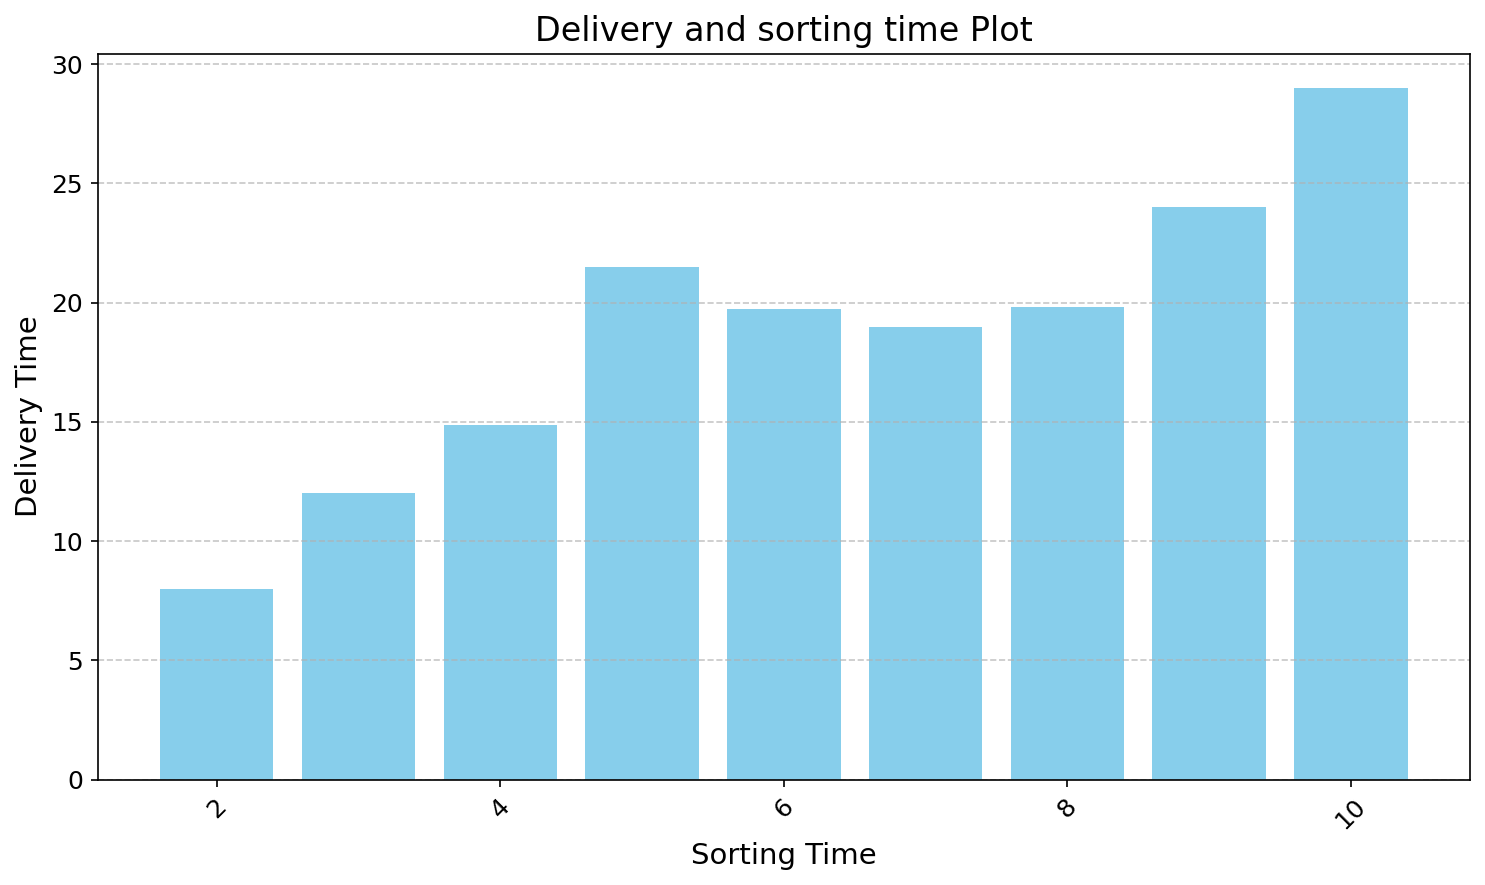

In [8]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(df['Sorting Time'], df['Delivery Time'], color='skyblue')  # Create the bar plot

# Add a title and labels
plt.title('Delivery and sorting time Plot', fontsize=16)
plt.xlabel('Sorting Time', fontsize=14)
plt.ylabel('Delivery Time', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


# Correlation analysis

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

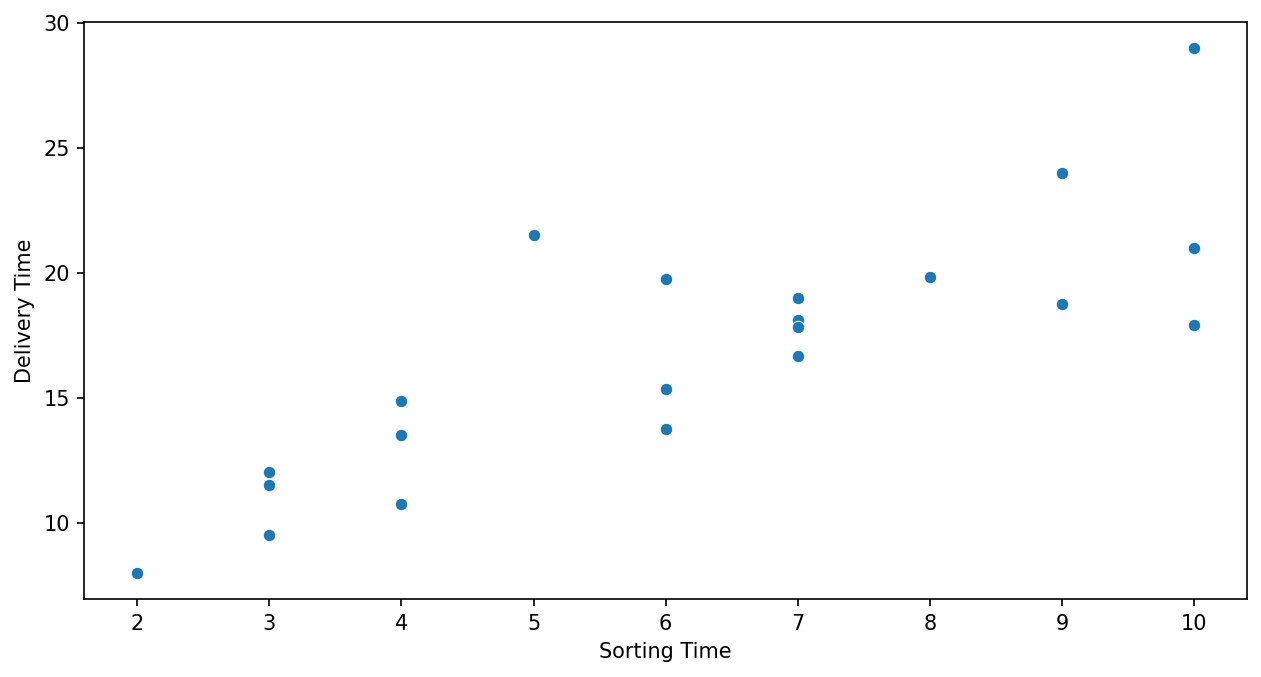

In [9]:
sns.scatterplot(x = df['Sorting Time'],y = df['Delivery Time'])

# Distribution of the data and skewness

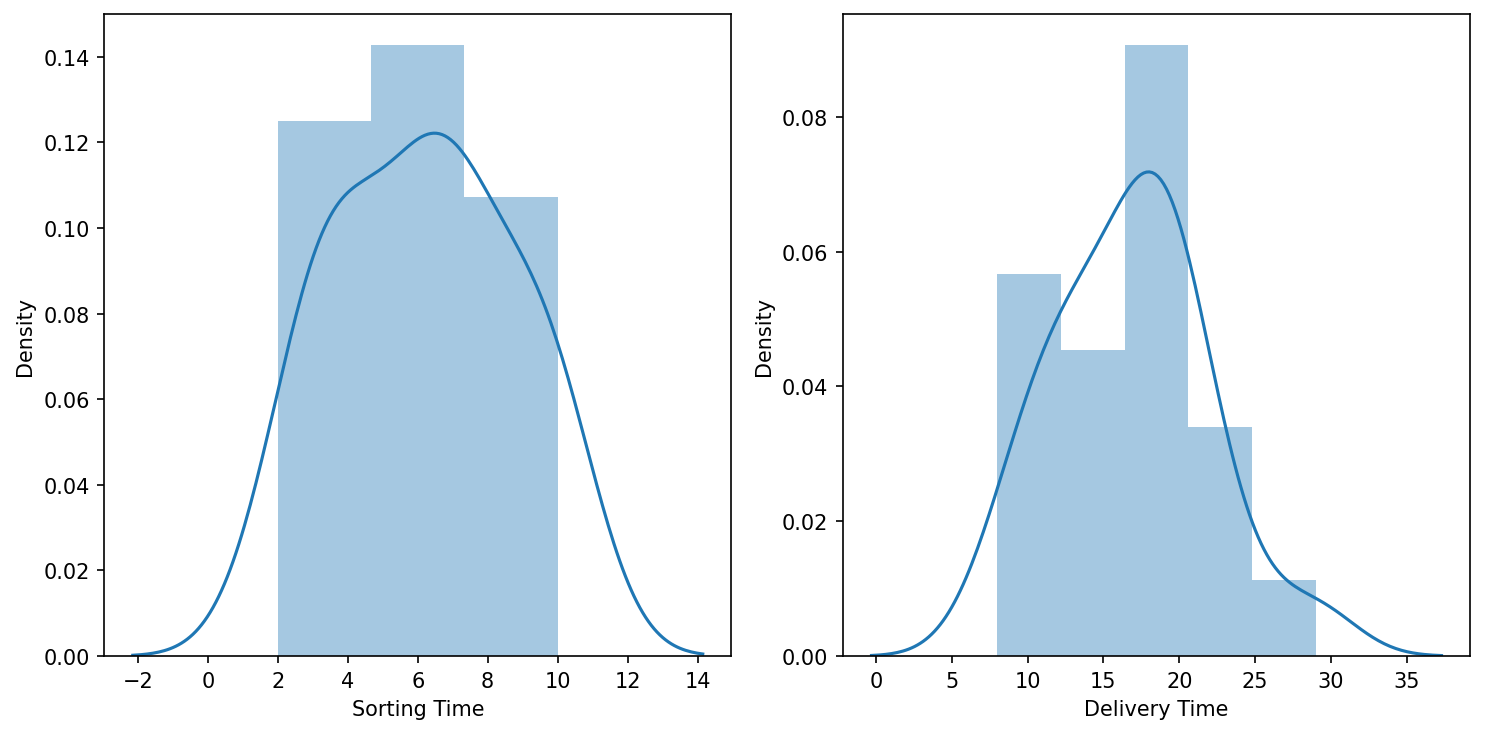

In [10]:
# Distribution of the data
df.head()
plt.subplot(1,2,1)
sns.distplot(df['Sorting Time'])

plt.subplot(1,2,2)
sns.distplot(df['Delivery Time'])

plt.tight_layout()

In [11]:
df['Sorting Time'].skew()

0.047115474210530174

In [12]:
df['Delivery Time'].skew()

0.3523900822831107

# Model Building

As stats moduledont take column name with space and any other characters we are here renaming the column name and using it

In [18]:
# Rename columns
df.rename(columns={'Delivery Time': 'DeliveryTime', 'Sorting Time': 'SortingTime'}, inplace=True)
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
model = smf.ols('DeliveryTime~SortingTime',data=df).fit()
model

In [20]:
#Model parameters (slope, intercept)
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [21]:
#Print p value
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [22]:
#Model Evaluation
#r2 value
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Data Transformation

# Log Transformation

In [24]:
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
np.log(df['SortingTime'])

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: SortingTime, dtype: float64

In [26]:
np.log(df['DeliveryTime'])

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: DeliveryTime, dtype: float64

In [27]:
df['log_DeliveryTime'] = np.log(df['DeliveryTime'])
df

,DeliveryTime,SortingTime,log_DeliveryTime
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296
5,15.35,6,2.731115
6,19.00,7,2.944439
7,9.50,3,2.251292
8,17.90,10,2.884801
9,18.75,9,2.931194


In [28]:
df['log_SortingTime'] = np.log(df['SortingTime'])
df

,DeliveryTime,SortingTime,log_DeliveryTime,log_SortingTime
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


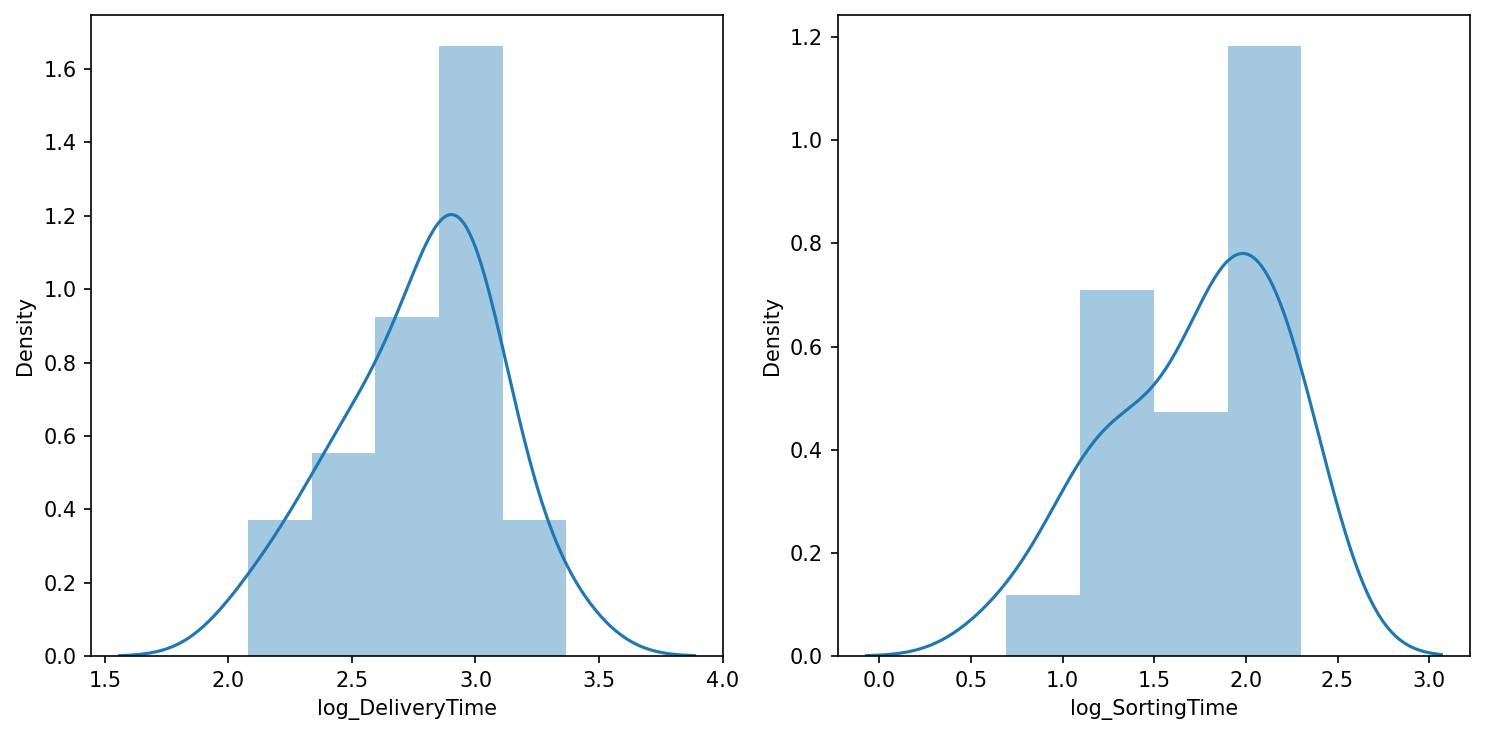

In [29]:
plt.subplot(1,2,1)
sns.distplot(df['log_DeliveryTime'])

plt.subplot(1,2,2)
sns.distplot(df['log_SortingTime'])

plt.tight_layout()

In [30]:
df['log_DeliveryTime'].skew(), df['log_SortingTime'].skew()

(-0.4512901148522999, -0.6052357185134765)

# Sqrt Transformation

In [31]:
df['sqrt_DeliveryTime'] = np.sqrt(df['DeliveryTime'])
df['sqrt_SortingTime'] = np.sqrt(df['SortingTime'])
df

,DeliveryTime,SortingTime,log_DeliveryTime,log_SortingTime,sqrt_DeliveryTime,sqrt_SortingTime
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278
5,15.35,6,2.731115,1.791759,3.917908,2.449490
6,19.00,7,2.944439,1.945910,4.358899,2.645751
7,9.50,3,2.251292,1.098612,3.082207,1.732051
8,17.90,10,2.884801,2.302585,4.230839,3.162278
9,18.75,9,2.931194,2.197225,4.330127,3.000000


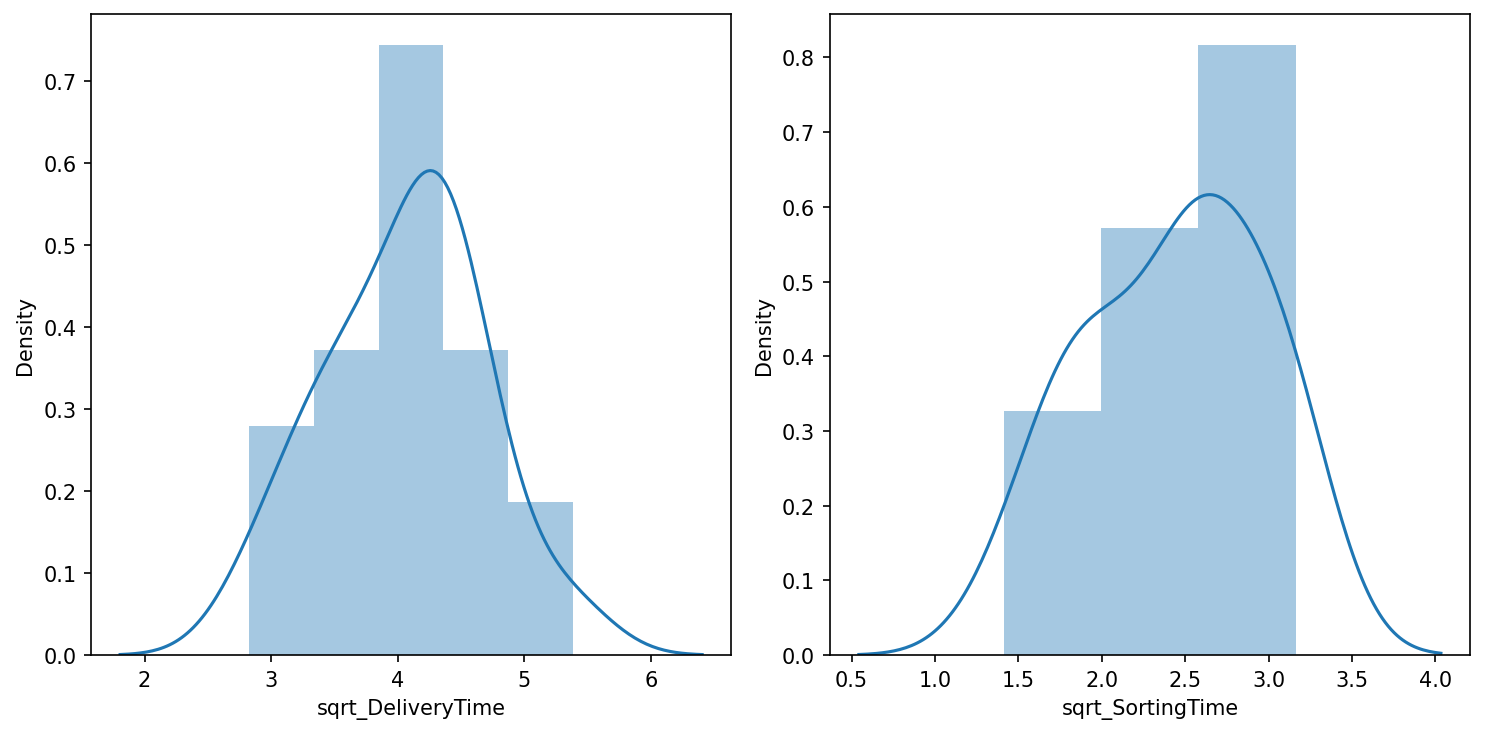

In [32]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_DeliveryTime'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_SortingTime'])

plt.tight_layout()

In [33]:
df['sqrt_DeliveryTime'].skew()

-0.0618105135865213

In [34]:
df['sqrt_SortingTime'].skew()

-0.25981634723613994